In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Ex. 9: Genetic Algorithm

First, a bunch of useful functions:

In [3]:
def sort_points_by_angle(points):   # sorts array of positions based on their angle
    points_list = points.tolist()
    
    def angle_from_positive_x_axis(point):
        x, y = point
        angle= math.atan2(y, x)
        if angle <0:
            angle+=2*math.pi
        return angle
    
    sorted_points_list = sorted(points, key=angle_from_positive_x_axis)
    sorted_points = np.array(sorted_points_list)
    return sorted_points

def totdist(a,N):   # calculates total distance for array of positions. !!! Can eliminate N in favor of a[0,:].size
    totd=0
    def distance(a,b):
        return math.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
    for i in range(N-1):
        totd+=distance(a[i,:],a[i+1,:])
    totd+=distance(a[N-1,:],a[0,:])
    return totd

def best_dist_circumference(a, N):   # sorts positions based on angle and returns total distance
    a_sorted = sort_points_by_angle(a)
    return totdist(a_sorted, N)

### TEST 0: Equally spaced cities over unit circumference

In [76]:
pos = np.loadtxt('../es9/DATA/test/cities.dat')

first_gen = []
last_gen = []
with open('../es9/DATA/test/best_path_steps_0.dat', 'r') as file:
    lines = file.readlines()
    # Get the specific line, strip any leading/trailing whitespace, and split by space
    first_gen = lines[0].strip().split(" ")
    last_gen = lines[len(lines)-1].strip().split(" ")
    
first_path=np.zeros(shape=(34,2))
for i in range(len(first_gen)):
    city=int(first_gen[i])
    first_path[i,:]=pos[city,:]
    
last_path=np.zeros(shape=(34,2))
for i in range(len(last_gen)):
    city=int(last_gen[i])
    last_path[i,:]=pos[city,:]

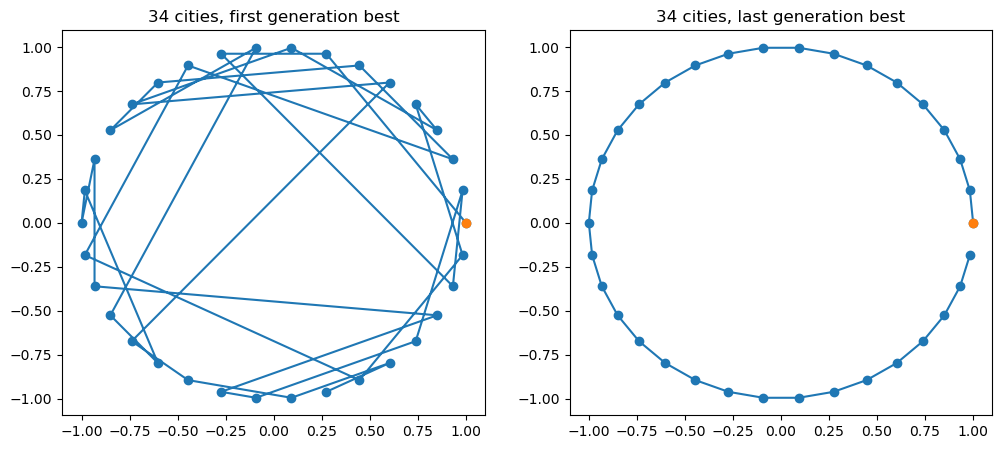

In [77]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(first_path[:,0],first_path[:,1], marker='o')
plt.plot(first_path[0,0],first_path[0,1], marker='o')
plt.title(str(pos[:,0].size) + ' cities, first generation best')

plt.subplot(1,2,2)
plt.plot(last_path[:,0],last_path[:,1], marker='o')
plt.plot(first_path[0,0],first_path[0,1], marker='o')
plt.title(str(pos[:,0].size) + ' cities, last generation best')

plt.show()

In [8]:
best_half=np.loadtxt('../es9/DATA/test/best_half_0.dat')
best_individual=np.loadtxt('../es9/DATA/test/best_individual_0.dat')

x=np.arange(best_half.size)

6.274248288416884


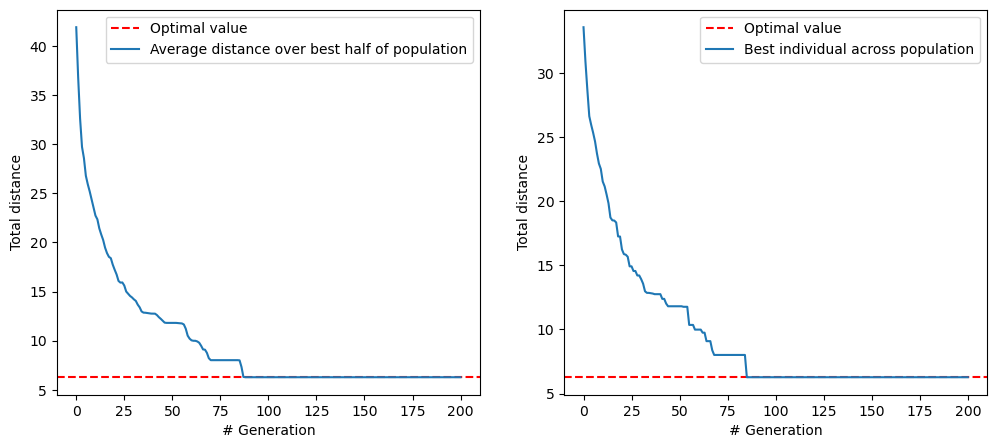

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].axhline(y=best_dist_circumference(pos, pos[:,0].size), color='r', linestyle='--', label='Optimal value')
axs[0].plot(x, best_half, label='Average distance over best half of population')
axs[0].set_xlabel('# Generation')
axs[0].set_ylabel('Total distance')
axs[0].legend(loc="upper right")
axs[1].axhline(y=best_dist_circumference(pos, pos[:,0].size), color='r', linestyle='--', label='Optimal value')
axs[1].plot(x, best_individual, label='Best individual across population')
axs[1].set_xlabel('# Generation')
axs[1].set_ylabel('Total distance')
axs[1].legend(loc="upper right")

print(best_dist_circumference(pos, pos[:,0].size))

## Ex 9.1: Randomly placed cities over unit circumference

In [73]:
pos = np.loadtxt('../es9/DATA/CIRCLE/cities.dat')

first_gen = []
last_gen = []
with open('../es9/DATA/CIRCLE/best_path_steps_0.dat', 'r') as file:
    lines = file.readlines()
    # Get the specific line, strip any leading/trailing whitespace, and split by space
    first_gen = lines[0].strip().split(" ")
    last_gen = lines[len(lines)-1].strip().split(" ")
    
first_path=np.zeros(shape=(34,2))
for i in range(len(first_gen)):
    city=int(first_gen[i])
    first_path[i,:]=pos[city,:]
    
last_path=np.zeros(shape=(34,2))
for i in range(len(last_gen)):
    city=int(last_gen[i])
    last_path[i,:]=pos[city,:]

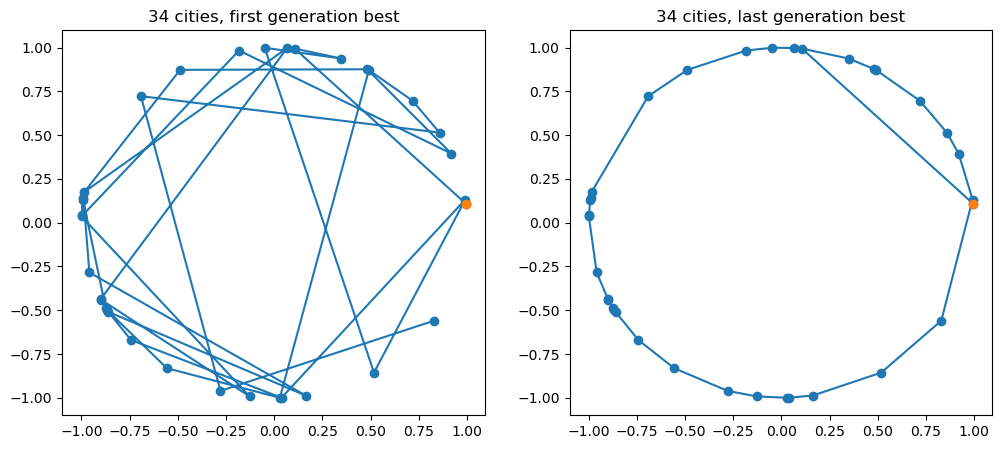

In [75]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(first_path[:,0],first_path[:,1], marker='o')
plt.plot(first_path[0,0],first_path[0,1], marker='o')
plt.title(str(pos[:,0].size) + ' cities, first generation best')

plt.subplot(1,2,2)
plt.plot(last_path[:,0],last_path[:,1], marker='o')
plt.plot(first_path[0,0],first_path[0,1], marker='o')
plt.title(str(pos[:,0].size) + ' cities, last generation best')

plt.show()

In [60]:
best_half=np.loadtxt('../es9/DATA/CIRCLE/best_half_0.dat')
best_individual=np.loadtxt('../es9/DATA/CIRCLE/best_individual_0.dat')

x=np.arange(best_half.size)

6.243056012436953


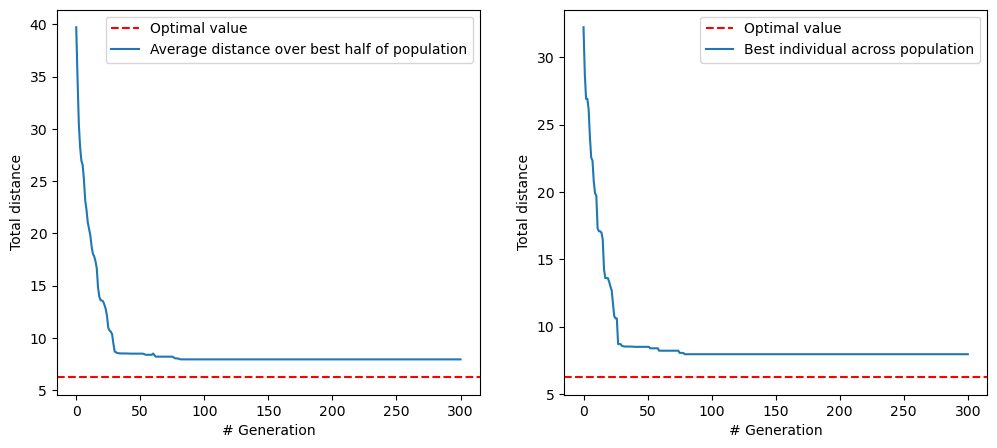

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].axhline(y=best_dist_circumference(pos, pos[:,0].size), color='r', linestyle='--', label='Optimal value')
axs[0].plot(x, best_half, label='Average distance over best half of population')
axs[0].set_xlabel('# Generation')
axs[0].set_ylabel('Total distance')
axs[0].legend(loc="upper right")
axs[1].axhline(y=best_dist_circumference(pos, pos[:,0].size), color='r', linestyle='--', label='Optimal value')
axs[1].plot(x, best_individual, label='Best individual across population')
axs[1].set_xlabel('# Generation')
axs[1].set_ylabel('Total distance')
axs[1].legend(loc="upper right")

print(best_dist_circumference(pos, pos[:,0].size))

## Ex 9.2: Randomly placed cities inside square

In [78]:
pos = np.loadtxt('../es9/DATA/SQUARE/cities.dat')

first_gen = []
last_gen = []
with open('../es9/DATA/SQUARE/best_path_steps_0.dat', 'r') as file:
    lines = file.readlines()
    # Get the specific line, strip any leading/trailing whitespace, and split by space
    first_gen = lines[0].strip().split(" ")
    last_gen = lines[len(lines)-1].strip().split(" ")
    
first_path=np.zeros(shape=(34,2))
for i in range(len(first_gen)):
    city=int(first_gen[i])
    first_path[i,:]=pos[city,:]
    
last_path=np.zeros(shape=(34,2))
for i in range(len(last_gen)):
    city=int(last_gen[i])
    last_path[i,:]=pos[city,:]

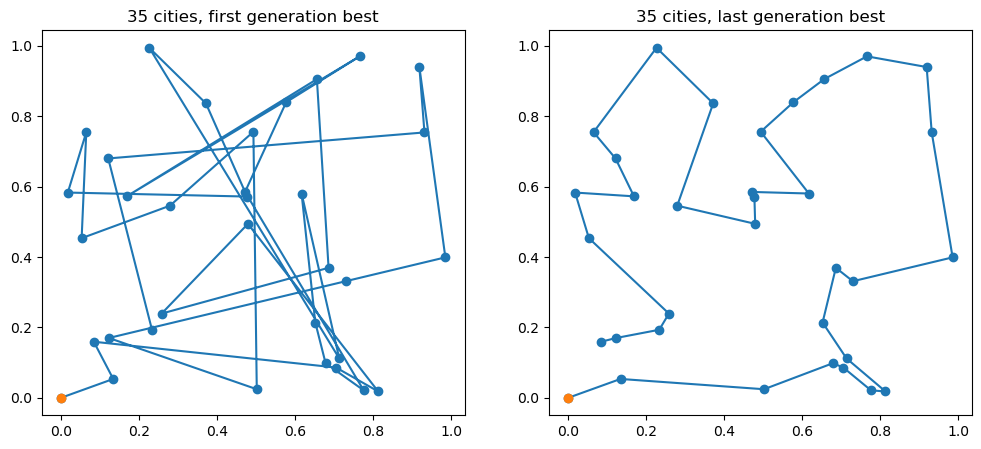

In [79]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(first_path[:,0],first_path[:,1], marker='o')
plt.plot(first_path[0,0],first_path[0,1], marker='o')
plt.title(str(pos[:,0].size) + ' cities, first generation best')

plt.subplot(1,2,2)
plt.plot(last_path[:,0],last_path[:,1], marker='o')
plt.plot(first_path[0,0],first_path[0,1], marker='o')
plt.title(str(pos[:,0].size) + ' cities, last generation best')

plt.show()

In [70]:
best_half=np.loadtxt('../es9/DATA/SQUARE/best_half_0.dat')
best_individual=np.loadtxt('../es9/DATA/SQUARE/best_individual_0.dat')

x=np.arange(best_half.size)

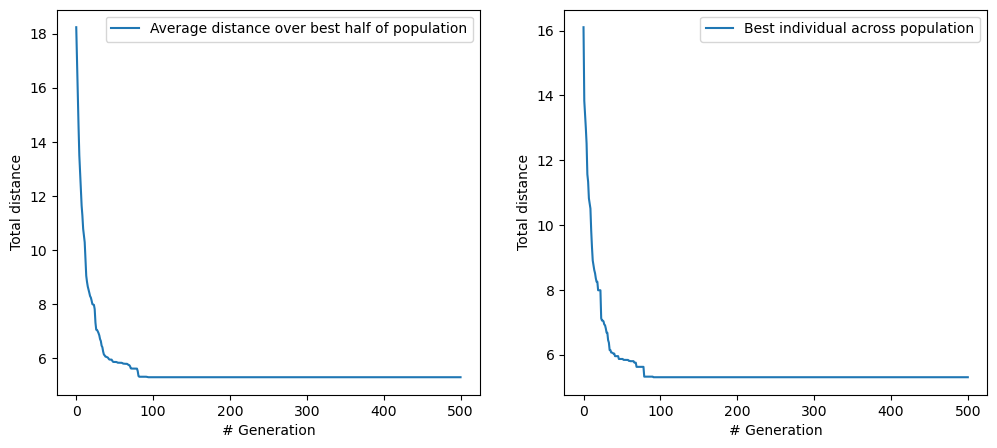

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, best_half, label='Average distance over best half of population')
axs[0].set_xlabel('# Generation')
axs[0].set_ylabel('Total distance')
axs[0].legend(loc="upper right")
axs[1].plot(x, best_individual, label='Best individual across population')
axs[1].set_xlabel('# Generation')
axs[1].set_ylabel('Total distance')
axs[1].legend(loc="upper right")